In [1]:
# model 套件
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PowerTransformer
import math
import warnings
warnings.filterwarnings('ignore')


# Second Preprocessing

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [3]:
# 處理 data 套件
import numpy as np
import pandas as pd

In [4]:
# let column can show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('Data/BayesianRidge_Pre_3/Input_C_057.csv')
# df1 = pd.read_csv('Input_C_057.csv')
# df2 = pd.read_csv('Input_C_050.csv')

In [6]:
title = ['Input_C_055','Input_C_135','Input_C_056','Input_C_052','Input_C_054','Input_C_059','Input_C_053']

# title = ['Input_C_055','Input_C_135','Input_C_056','Input_C_052',
#         'Input_C_054','Input_C_059','Input_C_053']

In [7]:
# 直接執行轉換拉到最下面會發現 Wraninig
for col in title: # Predict 不做轉換
    if abs(df[col].skew()) >= 0.7: # 取偏態絕對值大於 0.5的項
        print(col)
        pt = PowerTransformer() # PowerTransformer 預設為 Yeo-Johson 轉換可轉正負數，不同於另一種 Box-Cox 只能用於正數
        d = pt.fit_transform(df[col].values.reshape(-1, 1)).flatten()
        df[col]=d

Input_C_135
Input_C_056


In [8]:
X = df[title]
scaler = RobustScaler()
df[title] = scaler.fit_transform(X)
y = df['Predict']

In [9]:
def pMSE(ans,predict):
    pmse = math.sqrt(sum(pow((ans - predict)/ans*100,2)/len(ans)))
    return pmse

In [10]:
def pNumber(ans,predict,num):
    return sum(abs((ans-predict)/ans*100) < num)

# Split data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LassoCV

In [12]:
lasso = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30],random_state = 42)
lasso.fit(X_train, np.sqrt(y_train))
alpha = lasso.alpha_
print("first best alpha:", alpha)
lasso = LassoCV(alphas=[0.00004, 0.00008, 0.0001, 0.0003, 0.0006],random_state = 42)
lasso.fit(X_train, np.sqrt(y_train))
alpha = lasso.alpha_
print("second best alpha:", alpha)
lasso = LassoCV(alphas=[0.0001 + i/100000 for i in range(1, 20)], random_state = 42)
lasso.fit(X_train, np.sqrt(y_train))
alpha = lasso.alpha_
print("final best alpha:", alpha)

first best alpha: 1e-05
second best alpha: 4e-05
final best alpha: 0.00014000000000000001


In [13]:
y_pred = lasso.predict(X_test)

In [14]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.5215


In [15]:
print("Percentage mse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage mse score: 50.15


In [16]:
print("Number lower than error: %d"
      % pNumber(y_test, pow(y_pred,2), 15))

Number lower than error: 29


In [17]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, pow(y_pred,2))))

Root mean squared error: 0.005367


In [18]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    103.000000
mean      36.715159
std       34.328302
min        0.289180
10%        5.809392
20%       11.264350
30%       15.689932
40%       24.144411
50%       31.402762
60%       37.584981
70%       41.813398
80%       46.654610
90%       68.398783
max      191.246628
Name: Predict, dtype: float64

In [19]:
lasso.coef_

array([ 0.        ,  0.02793327,  0.01173078,  0.        ,  0.        ,
       -0.        ,  0.        ])

# Linear regresssion

In [19]:
# 建立一個線性回歸模型
regr = LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(X_train, np.sqrt(y_train))

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

In [20]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.6f"
      % mean_squared_error(y_test, pow(y_pred,2)))

Mean squared error: 0.000020


In [21]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, pow(y_pred,2))))

Root mean squared error: 0.004450


In [22]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test,pow(y_pred,2)))

R2 score: 0.6710


In [23]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("Linear regression score: %.4f"
      % regr.score(X_train,np.sqrt(y_train)))

Linear regression score: 0.8540


In [24]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, pow(y_pred,2)))

Percentage mse score: 46.49


In [25]:
# y_test : len 103
print("Number lower than error: %d"   
      % pNumber(y_test, pow(y_pred,2), 15))

Number lower than error: 26


In [26]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    103.000000
mean      33.564968
std       32.327068
min        0.139240
10%        6.206295
20%       13.540811
30%       16.495904
40%       20.999648
50%       26.657785
60%       32.094238
70%       38.481643
80%       43.706999
90%       54.651789
max      212.995872
Name: Predict, dtype: float64

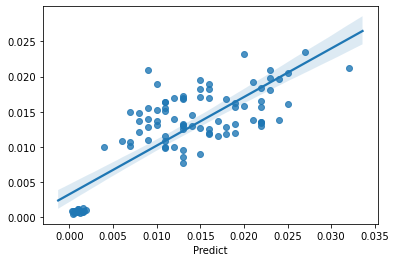

In [27]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.regplot(y_test, pow(y_pred,2))

In [28]:
# p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
# If p-value <= alpha (0.05) : Reject H0 => need Normally distributed
# If p-value > alpha (0.05) : Accept H0 
from statsmodels.stats.diagnostic import normal_ad
normal_ad(y_test - pow(y_pred,2))

(0.6295949107318819, 0.0982629339186437)

# XGBoost regression

In [29]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from scipy.stats import skew


# 先調 booster / n_estimators

In [30]:
#for tuning parameters
parameters_for_testing = {
    'booster':['gbtree','gblinear','dart'],
    'n_estimators':range(10,201,10),
}

other_params = {'learning_rate': 0.1, 'n_estimators': 90, 'max_depth': 5, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1794s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1306s.) Setting batch_size=6.
[Parallel(n_jobs=6)]: Batch computation too fast (0.1245s.) Setting batch_size=18.
[Parallel(n_jobs=6)]: Done  64 tasks      | elapsed:    3.8s


best params
{'booster': 'dart', 'n_estimators': 50}
best score
0.8163489635857947


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    6.0s finished


# 調 max_depth / min_child_weight

In [31]:
#for tuning parameters
parameters_for_testing = {
    'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10], 
    'min_child_weight': [1, 2, 3, 4, 5, 6]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 50, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0259s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:    0.2s


best params
{'max_depth': 7, 'min_child_weight': 6}
best score
0.8256780897985557


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.6s finished


# 調 gamma

In [32]:
#for tuning parameters
parameters_for_testing = {
    'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 7, 'min_child_weight': 6, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
best params
{'gamma': 0}
best score
0.8256780897985557


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0349s.) Setting batch_size=10.
[Parallel(n_jobs=6)]: Done   4 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=6)]: Done   7 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.1s finished


# 調 subsample / colsample_bytree

In [33]:
#for tuning parameters
parameters_for_testing = {
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 7, 'min_child_weight': 6, 'seed': 42,
 'reg_alpha': 0, 'reg_lambda': 1, 'gamma':0}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0279s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:    0.2s


best params
{'colsample_bytree': 0.8, 'subsample': 0.8}
best score
0.8256780897985557


[Parallel(n_jobs=6)]: Done 192 out of 192 | elapsed:    0.6s finished


# reg_alpha / reg_lambda

In [34]:
#for tuning parameters
parameters_for_testing = {
    'reg_alpha': [0,0.05, 0.1, 0.5 , 1, 2, 3], 'reg_lambda': [0.05, 0.1, 0.5 , 1, 2, 3]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 7, 'min_child_weight': 6, 'seed': 42,
 'gamma':0,'subsample':0.8,'colsample_bytree': 0.8}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0379s.) Setting batch_size=10.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'reg_alpha': 0, 'reg_lambda': 1}
best score
0.8256780897985557


[Parallel(n_jobs=6)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1578s.) Setting batch_size=24.
[Parallel(n_jobs=6)]: Done  76 out of 126 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 126 out of 126 | elapsed:    0.3s finished


# learning_rate

In [35]:
#for tuning parameters
parameters_for_testing = {
   'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]
}

other_params = {'booster':'dart', 'n_estimators': 50, 'max_depth': 7, 'min_child_weight': 6, 'seed': 42,
 'gamma':0,'subsample':0.8,'colsample_bytree': 0.8,'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best params
{'learning_rate': 0.1}
best score
0.8256780897985557


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0299s.) Setting batch_size=12.
[Parallel(n_jobs=6)]: Done   4 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=6)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.0s finished


In [36]:
best_xgb_model = XGBRegressor(
              learning_rate = 0.1,
              booster = 'dart', 
              n_estimators = 50, 
              max_depth = 7, 
              min_child_weight = 6,
              seed = 42,
              gamma = 0,
              subsample = 0.8,
              colsample_bytree = 0.8,
              reg_alpha =  0,
              reg_lambda = 1)

best_xgb_model.fit(X_train,np.sqrt(y_train))

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
y_pred = best_xgb_model.predict(X_test)

In [38]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.6884


In [39]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage rmse score: 48.42


In [40]:
print("Number lower than error: %d"
      % pNumber(y_test, pow(y_pred,2), 15))

Number lower than error: 22


In [41]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,pow(y_pred,2))))

Root mean squared error: 0.004331


In [42]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    103.000000
mean      34.219411
std       34.421764
min        0.072660
10%        8.622763
20%       13.490572
30%       16.980985
40%       20.232158
50%       24.711503
60%       28.978510
70%       34.841273
80%       46.005019
90%       63.960310
99%      152.676542
max      226.959145
Name: Predict, dtype: float64

In [43]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("XGBoost regression score: %.4f"
      % best_xgb_model.score(X_train,np.sqrt(y_train)))

XGBoost regression score: 0.9211


# DecisionTree

In [44]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(
            criterion ='mse', 
            random_state = 42
)

In [45]:
param_grid = {'max_depth': range(1,10,1),
              'min_samples_split': range(2,16,2)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0987s.) Setting batch_size=4.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0648s.) Setting batch_size=24.


best params
{'max_depth': 4, 'min_samples_split': 10}
best score
0.8152834603932976


[Parallel(n_jobs=6)]: Done 189 out of 189 | elapsed:    0.2s finished


In [46]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,10,1)
              }
    
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 4,
            min_samples_split = 10,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0220s.) Setting batch_size=18.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1009s.) Setting batch_size=70.


best params
{'max_leaf_nodes': 4, 'min_samples_leaf': 1}
best score
0.816638668970708


[Parallel(n_jobs=6)]: Done 216 out of 216 | elapsed:    0.1s finished


In [47]:
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 4,
            min_samples_split = 10,
            max_leaf_nodes = 4,
            min_samples_leaf = 1,
            random_state = 42
)
# 訓練模型
clf.fit(X_train,np.sqrt(y_train))

# 預測測試集
y_pred = clf.predict(X_test)

In [48]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.        0.        0.        0.9315009 0.0684991 0.        0.       ]


In [49]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.6187


In [50]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage rmse score: 48.93


In [51]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,pow(y_pred,2))))

Root mean squared error: 0.004791


In [52]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    103.000000
mean      36.190161
std       33.092510
min        2.223476
10%        6.998068
20%       11.070992
30%       16.420128
40%       21.336173
50%       26.983231
60%       34.330917
70%       44.690530
80%       49.984927
90%       69.781747
max      179.005797
Name: Predict, dtype: float64

#  RandomForest

In [53]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(
          criterion ='mse', 
          random_state = 42
)

In [54]:
param_grid = {
              'n_estimators': range(5,51,5),
              'max_depth': range(1,10,1),
              'min_samples_split': range(2,10,1)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0376s.) Setting batch_size=10.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1966s.) Setting batch_size=20.
[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 232 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 412 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 632 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 852 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 1112 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done 1372 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 1672 tasks      | elapsed:    8.2s


best params
{'max_depth': 4, 'min_samples_split': 8, 'n_estimators': 40}
best score
0.8279756431901796


[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed:   10.8s finished


In [55]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,15,1)
              }
    
clf = RandomForestRegressor(
            criterion ='mse', 
            n_estimators = 40,
            max_depth = 4,
            min_samples_split = 8,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 117 candidates, totalling 351 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0429s.) Setting batch_size=8.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done  76 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 148 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 220 tasks      | elapsed:    1.5s


best params
{'max_leaf_nodes': 12, 'min_samples_leaf': 4}
best score
0.8316107890304377


[Parallel(n_jobs=6)]: Done 340 out of 351 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 351 out of 351 | elapsed:    2.2s finished


In [56]:
clf = RandomForestRegressor( 
            criterion ='mse', 
            n_estimators = 40,
            max_depth = 4,
            min_samples_split = 8,
            max_leaf_nodes = 12,
            min_samples_leaf = 4,
            random_state = 42) 
#給予max_depth 可以避免過度擬和

# 訓練模型
clf.fit(X_train,np.sqrt(y_train))

# 預測測試集
y_pred = clf.predict(X_test)

In [57]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.12449003 0.07445102 0.05899307 0.49372136 0.13090211 0.09029851
 0.0271439 ]


In [58]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.6754


In [59]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage rmse score: 43.05


In [60]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,pow(y_pred,2))))

Root mean squared error: 0.004420


In [61]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    103.000000
mean      31.733578
std       29.226542
min        0.406399
10%        5.839398
20%       10.992948
30%       15.777040
40%       19.835545
50%       24.786077
60%       29.568376
70%       34.055997
80%       44.554946
90%       61.821113
max      141.690613
Name: Predict, dtype: float64

In [ ]:
# X = pd.concat([df[title], con1,con2], axis=1).to_numpy() 